<a href="https://colab.research.google.com/github/MarinaWolters/Coding-Tracker/blob/master/HandsOn7_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will cover dimensionality reduction and clustering in this notebook. 

We will:
- work with a dataset with all categorical attributes
- apply PCA and visualize the dimensions
- apply tSNE 
- compare classifier performance before and after the application of PCA on the data
- apply the kMeans clustering algorithm and evaluate the cluster assignments by comparing them with class labels on the dataset. 


**Install required libraries (if missing)**

In [ ]:
#!pip install pandas
#!pip install mpl_toolkits
#!pip install sklearn
#!pip install seaborn

**Import the required libraries**

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import random
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mpl_toolkits import mplot3d
from datetime import datetime
# from scipy.sparse import csr_matrix 

## Dataset

The dataset for this notebook comes from the UCI Machine Learning Repository. Description from the [source](https://archive.ics.uci.edu/ml/datasets/Mushroom): ```This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.```

We will apply PCA and tSNE to reduce the dimensionality of the dataset and visualize the class distribution with reduced feature sets. 



**Getting datasets for exploration**

In [ ]:
# Mushrooms data: poisonous or safe?
mushrooms_url = 'https://raw.githubusercontent.com/chandrasg/CIS5450_Summer22/main/mushrooms.csv'
mushrooms_df = pd.read_csv(mushrooms_url, engine='python')

print("The df has ",len(mushrooms_df.columns), " columns")
mushrooms_df.head()

The df has  23  columns


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,n,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,n,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,n,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
mushrooms_df['class']

0       p
1       n
2       n
3       p
4       n
       ..
8119    n
8120    n
8121    n
8122    p
8123    n
Name: class, Length: 8124, dtype: object

In [ ]:
# [TODO] store poisonous/non-poisonous values as an indicator variable (series) `y_mushrooms` and 
# delete the column from original dataframe
    # 1=poisonous; 0=non-poisonous
mushrooms_df['class'] = np.where(mushrooms_df['class'] == "p", 1, 0)
y_mushrooms = mushrooms_df['class']
mushrooms_df =  mushrooms_df.drop(['class'], axis=1)
y_mushrooms

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

In [ ]:
mushrooms_df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


## Data transformation: one-hot encoding

The column `class` represents if the mushroom is poisonous or not.

In [ ]:
# [TODO] Convert all the columns into one hot encodings, pandas.get_dummies
X_mushrooms = pd.get_dummies(mushrooms_df, columns = mushrooms_df.columns)

In [ ]:
X_mushrooms

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


# PCA

**Basic Concepts**


*   What is PCA?
*   How it works? Explain without much mathematics.
**   With Variance
*   What is PCA used for?



**Standardize the data**


*   What is Feature scaling?
*   Why do we need it?



The columns in the feature matrix are all binary (0/1) - do we still need to scale them? 

Note: PCA is not scale invariant, so we need to standardize the features. Does the one-hot encoded feature vector have 0 mean and unit variance?

In [ ]:
# [TODO] apply StandardScaler
scaler = StandardScaler()
X_mushrooms_scaled = scaler.fit_transform(X_mushrooms)

# logging time before running PCA
t_pre_PCA = datetime.now()

# [TODO] apply PCA and calculate the time it took
n_components = 117 # number of features
pca_after_scaling = PCA(n_components)
X_mushrooms_transformed = pd.DataFrame(data = pca_after_scaling.fit_transform(X_mushrooms_scaled))

# logging time after running PCA
t_post_PCA = datetime.now()
t_diff_PCA = (t_post_PCA - t_pre_PCA).total_seconds()
print("Time taken for PCA: " + str(t_diff_PCA) + " seconds.")

X_mushrooms_transformed

Time taken for PCA: 0.167195 seconds.


,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
0,-3.284737,1.020105,-1.353591,1.361726,-0.478375,-0.486227,-2.988416,-1.085874,-4.908155,4.233882,...,6.132995e-16,-3.369143e-16,1.582891e-15,-5.323573e-17,-2.130966e-19,-1.982798e-16,-5.517360e-17,-2.814591e-16,2.176743e-17,9.404932e-18
1,-3.969481,-0.856895,0.237503,1.903058,1.281135,-2.193247,-4.367826,-0.494000,0.960146,-1.858999,...,-3.903533e-17,1.807065e-15,1.157036e-15,-1.644890e-15,5.179458e-16,1.194750e-15,2.773991e-17,4.527110e-16,-5.289814e-17,-1.407825e-16
2,-4.958586,-0.211112,0.466430,1.557341,1.971429,-3.363282,-5.567695,-0.925606,2.946658,-1.862181,...,2.485049e-16,9.101278e-17,1.641712e-16,9.124874e-17,-2.546630e-17,-6.890821e-17,-3.192608e-17,1.334252e-16,-2.822118e-17,3.411155e-17
3,-3.469967,0.337933,-1.334981,0.881358,-0.008583,-0.638624,-3.126145,-0.874086,-4.493688,4.287290,...,5.245909e-16,-8.960350e-16,1.319605e-16,-4.391374e-16,2.200810e-16,4.534116e-17,-6.456330e-18,9.178913e-16,-3.634807e-16,1.769602e-17
4,-2.726570,0.889648,-2.051852,4.117670,-2.710545,2.501482,1.354385,0.029147,0.451190,-1.160304,...,-2.608200e-15,-5.411992e-15,2.178156e-15,-3.427076e-15,9.157399e-16,8.983808e-16,5.971756e-16,-2.606811e-15,-2.104001e-16,-6.497846e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,-1.393194,9.999910,16.232501,-0.584967,-4.551468,0.140199,0.335870,0.000809,-0.374597,-0.124104,...,1.223635e-15,1.259046e-15,2.323267e-16,-1.592053e-17,5.099728e-17,-5.277621e-17,1.571000e-16,2.204608e-17,1.081048e-16,-2.760635e-17
8120,-1.287639,9.097590,15.370208,-1.154645,-5.643498,0.663978,-0.929757,-0.353862,0.125002,0.532993,...,1.734726e-15,6.291713e-16,2.145744e-16,-8.360827e-17,-1.184719e-16,-1.600017e-16,-9.615328e-18,-3.226266e-17,1.225600e-16,3.688205e-17
8121,-1.873895,8.649390,14.551919,-0.944419,-5.257482,-0.417212,0.414327,-0.474802,-1.059578,-0.620769,...,-4.249989e-15,-1.293186e-15,9.069324e-16,-1.710069e-16,2.233096e-16,1.131048e-16,-2.663466e-16,2.139542e-16,4.149606e-17,3.850309e-17
8122,3.636892,4.460836,-2.083112,-0.019594,0.249901,-0.448527,-1.140793,0.141322,-0.158419,-0.312264,...,2.691483e-16,-2.867200e-17,1.728542e-17,-1.885460e-17,-1.055228e-16,-6.722868e-19,-2.052823e-16,-9.308622e-17,-3.430432e-17,1.743519e-17


In [ ]:
# take a look at the compnents
pca_after_scaling.components_

array([[-7.98339971e-02, -1.89252673e-03,  1.34365568e-02, ...,
         1.35525510e-01, -4.48908651e-02, -2.58374832e-02],
       [ 1.67428750e-02,  8.19248225e-03, -4.18867608e-02, ...,
        -1.39216652e-02, -6.36620341e-03,  5.10978453e-02],
       [ 5.86636461e-02,  8.55096668e-03, -6.41308185e-03, ...,
        -7.09016401e-03, -2.15528488e-02,  1.85009003e-02],
       ...,
       [-0.00000000e+00, -7.36221381e-17,  6.23905184e-17, ...,
         1.28910028e-02,  7.70706087e-03,  4.28978062e-03],
       [-0.00000000e+00,  3.46944695e-18, -1.34824463e-16, ...,
         2.84161730e-03,  1.69889945e-03,  2.25733305e-04],
       [-0.00000000e+00,  1.01047642e-16,  1.32282105e-17, ...,
         5.56130869e-04,  3.32490383e-04,  5.35846270e-03]])

In [ ]:
pca_after_scaling.explained_variance_ratio_

array([8.89101688e-02, 8.12547437e-02, 7.20360067e-02, 5.85864962e-02,
       5.18813706e-02, 4.39384939e-02, 4.05311162e-02, 2.83171624e-02,
       2.35580671e-02, 2.23764678e-02, 1.93936917e-02, 1.86436129e-02,
       1.79725410e-02, 1.57852165e-02, 1.43137572e-02, 1.33845537e-02,
       1.20142218e-02, 1.13904862e-02, 1.12974329e-02, 1.09215113e-02,
       1.04749300e-02, 9.86321120e-03, 9.77409885e-03, 9.52703898e-03,
       9.49454033e-03, 9.27854833e-03, 9.25846375e-03, 9.16722701e-03,
       9.06712620e-03, 8.78041933e-03, 8.72377712e-03, 8.67192704e-03,
       8.67192704e-03, 8.63770138e-03, 8.57362322e-03, 8.50639716e-03,
       8.35003542e-03, 8.14736954e-03, 8.03145750e-03, 7.94307939e-03,
       7.66757315e-03, 7.53134900e-03, 7.19602054e-03, 7.10497220e-03,
       6.94259954e-03, 6.79312425e-03, 6.68186078e-03, 6.38322825e-03,
       6.20442957e-03, 6.04248247e-03, 6.00369729e-03, 5.71844989e-03,
       5.60384817e-03, 5.38049914e-03, 5.19795326e-03, 5.06941504e-03,
      

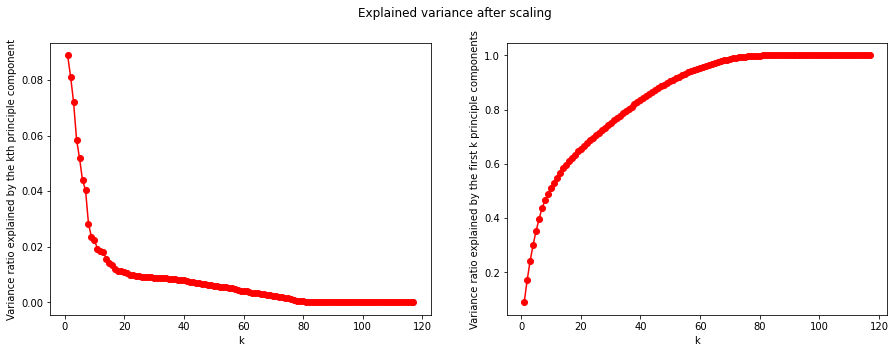

In [ ]:
# [TODO] plot a) variance explained by the kth PC and b) variance explained by the first k PCs (cumulative) 

pca_var_b = pca_after_scaling.explained_variance_ratio_

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Explained variance after scaling')

# fill the blank
ax1.plot( np.arange(n_components) + 1, pca_var_b, 'o-', color="red")
ax1.set_xlabel("k")
ax1.set_ylabel("Variance ratio explained by the kth principle component")

# fill the blank
ax2.plot(np.arange(n_components) + 1, np.cumsum(pca_var_b), 'o-', color  = "red")
ax2.set_xlabel("k")
ax2.set_ylabel("Variance ratio explained by the first k principle components")

plt.show()

**Discussion**: What conclusions do you draw from the above graphs?

In [ ]:
# [TODO] How many components do we need to explain 95% of the variance? 
a = np.cumsum(pca_var_b)
np.where(a > 0.95)[0][0]

58

In [ ]:
variance_explained_cumsum_list = list(a)
variance_explained_cumsum_list.index(list(filter(lambda i: i > 0.95, variance_explained_cumsum_list))[0])

58

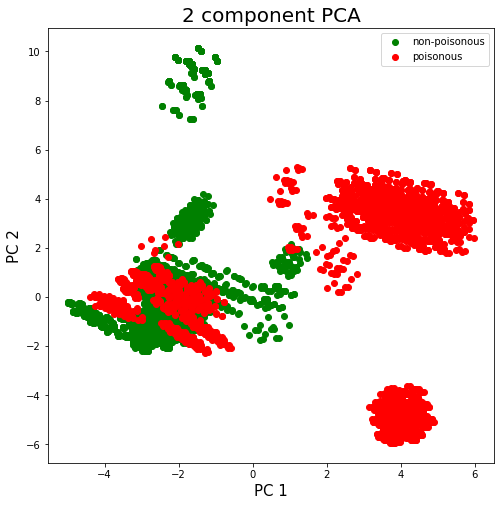

In [ ]:
# [TODO] plot a scatter plot of the first two PCs

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC 1', fontsize=15)
ax.set_ylabel('PC 2', fontsize=15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['g', 'r']
for target, color in zip(targets, colors):
  indicesToKeep = (y_mushrooms == target)
  ax.scatter(X_mushrooms_transformed.loc[indicesToKeep, 0],X_mushrooms_transformed.loc[indicesToKeep, 1], c = color)

ax.legend(['non-poisonous','poisonous'])

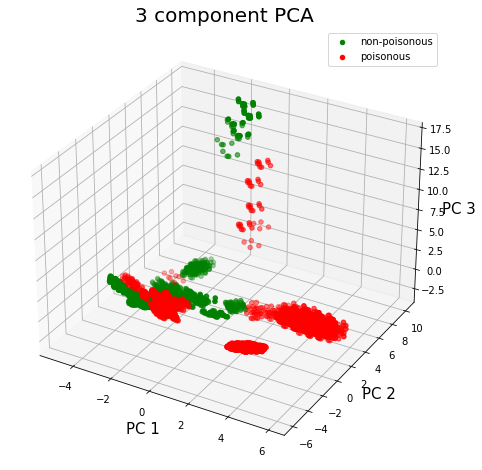

In [ ]:
# [Optional TODO] plot a scatter plot of the first three PCs 

fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_zlabel('PC 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

targets = [0,1]
colors = ['g', 'r']
for target, color in zip(targets, colors):
  indicesToKeep = (y_mushrooms == target)
  ax.scatter(X_mushrooms_transformed.loc[indicesToKeep, 0],
             X_mushrooms_transformed.loc[indicesToKeep, 1], 
             X_mushrooms_transformed.loc[indicesToKeep, 2], c = color)

ax.legend(['non-poisonous','poisonous'])
ax.grid()
plt.show()

# t-SNE

**What's the difference betweeen PCA and t-SNE?**

Now, let's apply tSNE on the same dataset

In [ ]:
# logging time before running tSNE
t_pre_tSNE = datetime.now()
n_components = 2

# [TODO] apply TSNE
X_mushrooms_tr_tsne = pd.DataFrame(data = TSNE(n_components).fit_transform(X_mushrooms_scaled))
t_post_tSNE = datetime.now()

# logging time after running tSNE
t_diff_tSNE = (t_post_tSNE - t_pre_tSNE).total_seconds()
print("Time taken for 2-dimensional tSNE: " + str(t_diff_tSNE) + " seconds.")

Time taken for 2-dimensional tSNE: 81.67262 seconds.


Note the time it took to run tSNE and contrast it with PCA. 

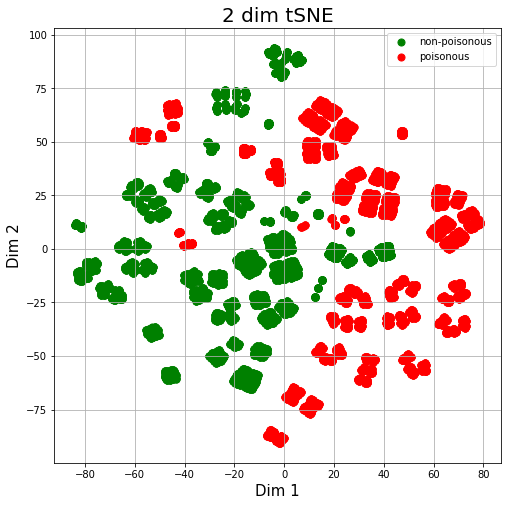

In [ ]:
# [TODO] plot the 2-dimesnsional tSNE

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Dim 1', fontsize = 15)
ax.set_ylabel('Dim 2', fontsize = 15)
ax.set_title('2 dim tSNE', fontsize = 20)
targets = [0, 1]
colors = ['g', 'r']
for target, color in zip(targets, colors):
    indicesToKeep = (y_mushrooms == target)
    ax.scatter(X_mushrooms_tr_tsne.loc[indicesToKeep, 0],
               X_mushrooms_tr_tsne.loc[indicesToKeep, 1],
               c = color,
               s = 50)
ax.legend(['non-poisonous','poisonous'])
ax.grid()
plt.show()

# Building a classifier

Let's evaluate how a classifier performance is impacted by the application of PCA to the data. Do we expect the performance to improve or worsen? 

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(\
  X_mushrooms_scaled, y_mushrooms, test_size=0.20, random_state=42)

# Train a simple linear regression classifier

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

regr.predict(X_test)

performance_beforePCA = regr.score(X_test, y_test)
print("Regression Score on Test data with Linear Classifier before PCA",str(performance_beforePCA))

# Fit the PCA on the training data (with 95% variance explained)
num_pcs_95 = 58
pca = PCA(n_components=num_pcs_95)
pca.fit(X_train)
# and transform it
X_train_2 = pca.transform(X_train)

# Train a simple linear regression classifier after PCA
regr_2 = linear_model.LinearRegression()
regr_2.fit(X_train_2, y_train)

X_test_2 = pca.transform(X_test)
regr_2.predict(X_test_2)

performance_afterPCA = regr_2.score(X_test_2, y_test)

print("Regression Score on Test data with Linear Classifier after PCA",str(performance_afterPCA))

Regression Score on Test data with Linear Classifier before PCA 1.0
Regression Score on Test data with Linear Classifier after PCA 0.9365853812601688


# Clustering

Let us use the Elbow method to identify the optimal number of clusters for this dataset. 

[Code from the lecture adapted to this data]

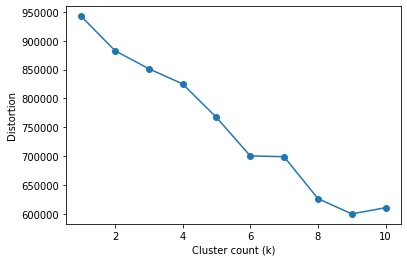

In [ ]:
from sklearn.cluster import KMeans

distortions = []

max_k = 10
for i in range(1,max_k+1):
  km = KMeans(n_clusters=i,
              init='random',
              n_init=1,
              max_iter=300,
              random_state=0)
  km.fit(X_mushrooms_transformed)
  # The distortion is called inertia in SciKit
  distortions.append(km.inertia_)

plt.plot(range(1,max_k+1), distortions, marker='o')
plt.xlabel('Cluster count (k)')
plt.ylabel('Distortion')
plt.show()


Now let us run kMeans clustering algorithm with k=9 and obtain cluster assignments on the dataset. 

In [ ]:
from sklearn.cluster import KMeans
# [TODO]  K-means clustering
kmeans = KMeans(n_clusters=9)
kmeans.fit(X_mushrooms_transformed)
y_kmeans = kmeans.predict(X_mushrooms_transformed)
y_kmeans

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([5, 5, 5, ..., 4, 7, 4], dtype=int32)

In [ ]:
X_mushrooms_transformed_arr = np.array(X_mushrooms_transformed)

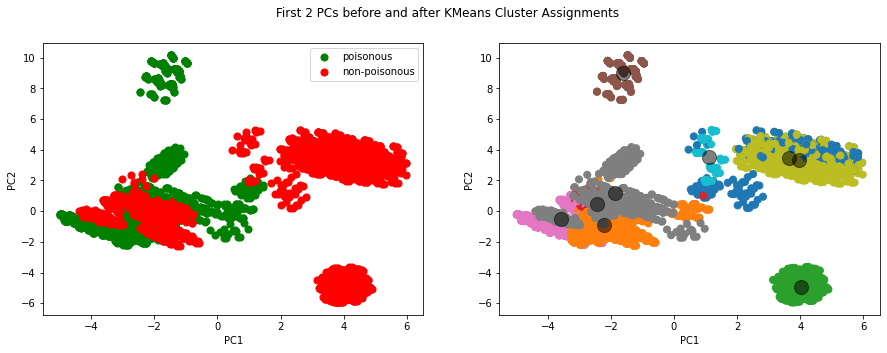

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('First 2 PCs before and after KMeans Cluster Assignments')

ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")
targets = [0, 1]
colors = ['g', 'r']
for target, color in zip(targets, colors):
    indicesToKeep = (y_mushrooms == target)
    ax1.scatter(X_mushrooms_transformed.loc[indicesToKeep, 0],
               X_mushrooms_transformed.loc[indicesToKeep, 1],
               c = color,
               s = 50)
ax1.legend(['poisonous','non-poisonous'])

ax2.scatter(X_mushrooms_transformed_arr[:, 0], X_mushrooms_transformed_arr[:, 1], c=y_kmeans, s=50, cmap='tab10')
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")
centers = kmeans.cluster_centers_
ax2.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
#ax2.legend(y_kmeans)

Let us calculate the proportion of poisonous mushrooms in each cluster

In [ ]:
for i in range(9):
  selected_indices = (y_kmeans == i)
  print('Proportion of poisonous mushrooms in cluster' + str(i) + ': ' + str(np.average(y_mushrooms[selected_indices])))

Proportion of poisonous mushrooms in cluster0: 0.9305135951661632
Proportion of poisonous mushrooms in cluster1: 0.20033181252592286
Proportion of poisonous mushrooms in cluster2: 1.0
Proportion of poisonous mushrooms in cluster3: 0.0
Proportion of poisonous mushrooms in cluster4: 0.0
Proportion of poisonous mushrooms in cluster5: 0.256
Proportion of poisonous mushrooms in cluster6: 0.12727272727272726
Proportion of poisonous mushrooms in cluster7: 1.0
Proportion of poisonous mushrooms in cluster8: 1.0


Note the distribution of poisonous mushrooms across clusters. What does that tell us about the quality of the clusters?